In [1]:
%matplotlib inline

Animations
======

Matplotlib can be used to create animations of plots over time.  The animations can be converted to video, which can then be embedded in a web page using the HTML `video` element.

In [10]:
from IPython.core.display import HTML

def vid_player(vids):
    """ will display html 5 player for compatible browser

    Parameters :
    ------------
    filepath : relative filepath with respect to the notebook directory ( where the .ipynb are not cwd)
               of the file to play

    The browser need to know how to play wav through html5.

    there is no autoplay to prevent file playing when the browser opens
    """
    from textwrap import dedent
    parts = []
    parts.append(dedent("""\
    <head>
    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
    <title>Simple Test</title>
    </head>
    <body>
    <video controls="controls" style="width:600px" >
    """))
    for vid in vids:
        path = vid['path']
        vid_type = vid.get('type', None)
        codec = vid.get('codecs', None)
        things = []
        things.append("""<source src="files/%s" """ % path)
        if vid_type is not None:
            things.append(""" type="%s" """ % vid_type)
        if codec is not None:
            things.append(""" codecs="%s" """ % codec)
        things.append(""" /> """)
        parts.append(' '.join(x.strip() for x in things))
 
    parts.append(dedent("""\
      Your browser does not support the video element.
    </video>
    </body>
    """))
    src = '\n'.join(parts)
    return HTML(src)

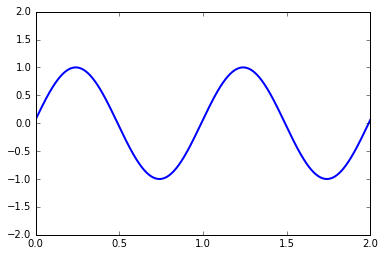

In [14]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

vids = [
        {'path': './animate/sine_animate.webm',
         'type': 'video/webm',
         'codecs': 'vp8, vorbis'},
        {'path': './animate/sine_animate.mp4',
         'type': 'video/mp4',
         'codecs': None},]
for vid in vids:
    vid_type = vid['type']
    fname = vid['path']
    # The code to convert the video is a bit tempermental.
    # `animation.AVConvWriter` shells out to the `avconv` tool.
    # There is also an `FFMPEGWriter`, so the writer you use depends on the tools
    # available on your system.
    if vid_type == 'video/mp4':
        writer = animation.AVConvWriter(fps=30, codec='mpeg4', bitrate=1800)
        anim.save(fname, fps=30, writer=writer)
        # You may have to specify extra command line args, etc.
        # anim.save(fname, writer=writer, fps=30, extra_args=['-vcodec', 'mpeg4'])
    elif vid_type == 'video/webm':
        writer = animation.AVConvWriter(fps=30, codec='libvpx', bitrate=1800)
        anim.save(fname, fps=30, writer=writer)


In [15]:
vid_player(vids)